# In this notebook we impute the missing values in our dataset.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv('data/dataFile.csv')
df

,seconds_elapsed,z_accelerometer,y_accelerometer,x_accelerometer,z_gyroscope,y_gyroscope,x_gyroscope,user
0,0.040027,-0.743177,-0.262221,-0.391995,0.203035,0.026631,-0.031968,3
1,0.040460,0.600845,0.465898,-1.121842,-0.556805,-0.030059,-0.312905,1
2,0.049252,1.260347,-0.319836,-0.342097,-0.110204,0.161805,-0.306240,1
3,0.049960,-0.585656,-0.278538,-0.433894,0.171001,0.088100,-0.004555,3
4,0.059245,1.274834,-0.240963,-0.358970,-0.145028,0.080974,-0.380480,1
...,...,...,...,...,...,...,...,...
232641,775.538496,-0.985645,-6.406092,5.141987,1.225872,-0.110520,1.289578,3
232642,775.539918,-7.387298,-8.144462,0.807643,-0.370583,-1.712168,-0.019191,2
232643,775.544682,0.172228,-0.416443,0.286711,-0.334846,-0.421050,-0.304001,1
232644,775.548429,-0.732786,-5.806568,5.015984,1.414098,0.109211,1.592959,3


In [101]:
df.isna().sum() / len(df)

seconds_elapsed    0.0
z_accelerometer    0.0
y_accelerometer    0.0
x_accelerometer    0.0
z_gyroscope        0.0
y_gyroscope        0.0
x_gyroscope        0.0
user               0.0
dtype: float64

## Outliers and Noise Removal

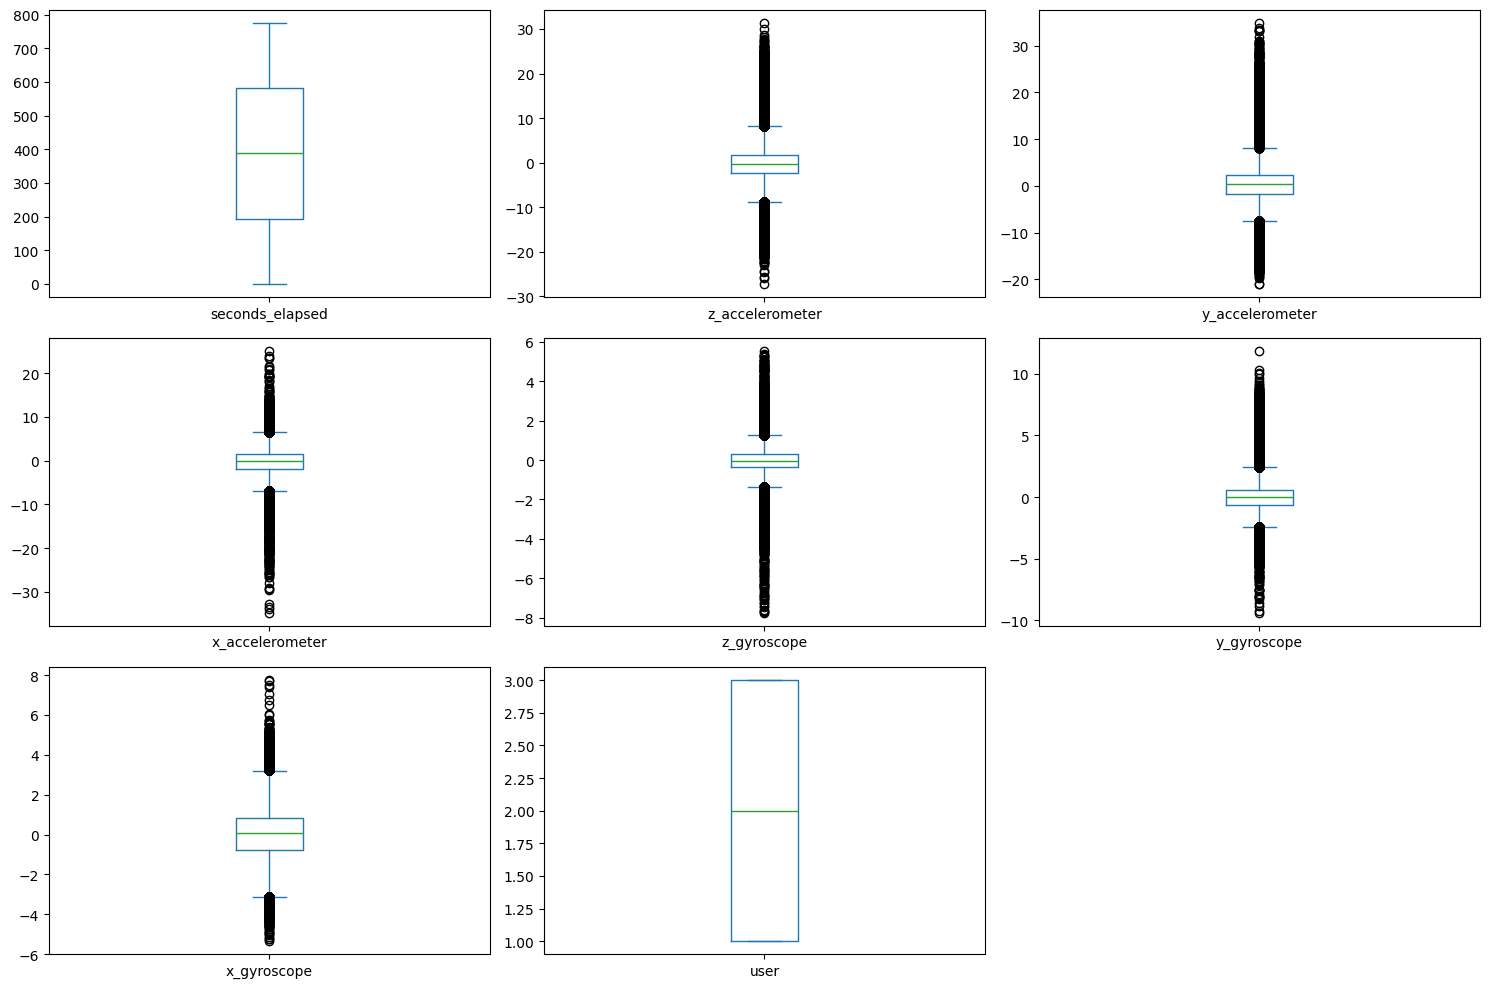

In [102]:
df.plot(kind='box', subplots=True, layout=(int(len(df.columns)**0.5)+1, -1), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


#### Let's start by checking the normality of the features
#### As we can see, there are no normal features.

#### Therefore, we can discard Chauvenet's criterion and Mixture models

In [103]:
from scipy.stats import anderson

for col in df.columns:
    result = anderson(df[df.user == 1][col].dropna(), dist='norm')
    print(f"{col} Anderson-Darling statistic:", result.statistic)
    print(f"Significance level at 5%: critical value 0.787")
        

seconds_elapsed Anderson-Darling statistic: 862.2850035502197
Significance level at 5%: critical value 0.787
z_accelerometer Anderson-Darling statistic: 34.58206940366654
Significance level at 5%: critical value 0.787
y_accelerometer Anderson-Darling statistic: 333.56289038843533
Significance level at 5%: critical value 0.787
x_accelerometer Anderson-Darling statistic: 11.495183165665367
Significance level at 5%: critical value 0.787
z_gyroscope Anderson-Darling statistic: 126.9339434743597
Significance level at 5%: critical value 0.787
y_gyroscope Anderson-Darling statistic: 80.7713024281984
Significance level at 5%: critical value 0.787
x_gyroscope Anderson-Darling statistic: 65.21697200037306
Significance level at 5%: critical value 0.787
user Anderson-Darling statistic: nan
Significance level at 5%: critical value 0.787


/Users/eliandromelo/miniconda3/lib/python3.12/site-packages/scipy/stats/_morestats.py:2248: RuntimeWarning: invalid value encountered in divide
  w = (y - xbar) / s


In [104]:
from scipy.stats import anderson

for col in df.columns:
    result = anderson(df[df.user == 2][col].dropna(), dist='norm')
    print(f"{col} Anderson-Darling statistic:", result.statistic)
    print(f"Significance level at 5%: critical value 0.787")
        

seconds_elapsed Anderson-Darling statistic: 862.2879687624372
Significance level at 5%: critical value 0.787
z_accelerometer Anderson-Darling statistic: 192.3672889258596
Significance level at 5%: critical value 0.787
y_accelerometer Anderson-Darling statistic: 620.2929742055712
Significance level at 5%: critical value 0.787
x_accelerometer Anderson-Darling statistic: 307.0955979850405
Significance level at 5%: critical value 0.787
z_gyroscope Anderson-Darling statistic: 304.57868476172735
Significance level at 5%: critical value 0.787
y_gyroscope Anderson-Darling statistic: 545.9456882523955
Significance level at 5%: critical value 0.787
x_gyroscope Anderson-Darling statistic: 367.0480376746709
Significance level at 5%: critical value 0.787
user Anderson-Darling statistic: nan
Significance level at 5%: critical value 0.787


In [105]:
from scipy.stats import anderson

for col in df.columns:
    result = anderson(df[df.user == 3][col].dropna(), dist='norm')
    print(f"{col} Anderson-Darling statistic:", result.statistic)
    print(f"Significance level at 5%: critical value 0.787")
        

seconds_elapsed Anderson-Darling statistic: 862.295301475795
Significance level at 5%: critical value 0.787
z_accelerometer Anderson-Darling statistic: 444.6247334117652
Significance level at 5%: critical value 0.787
y_accelerometer Anderson-Darling statistic: 1082.8860577607848
Significance level at 5%: critical value 0.787
x_accelerometer Anderson-Darling statistic: 430.1989922020148
Significance level at 5%: critical value 0.787
z_gyroscope Anderson-Darling statistic: 318.27704615937546
Significance level at 5%: critical value 0.787
y_gyroscope Anderson-Darling statistic: 90.76867761541507
Significance level at 5%: critical value 0.787
x_gyroscope Anderson-Darling statistic: 91.76128587093262
Significance level at 5%: critical value 0.787
user Anderson-Darling statistic: nan
Significance level at 5%: critical value 0.787


#### Let's try a distance based method.
#### We will use Local Outlier Factor (by user) since it considers local density into account.
#### We chose n_neighbors = 20 since it is the default scikit learn value.
#### As distance metric, we use the Euclidean Distance.

In [106]:
df['outlier'] = 0
df['lof_score'] = 0

In [107]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

for user in df.user.unique():
    X = df[df.user == user].dropna()
    X_scaled = StandardScaler().fit_transform(X)
    clf = LocalOutlierFactor(n_neighbors=20)
    clf.fit_predict(X_scaled)
    lof_scores = -clf.negative_outlier_factor_
    df.loc[X.index, 'lof_score'] = lof_scores

    

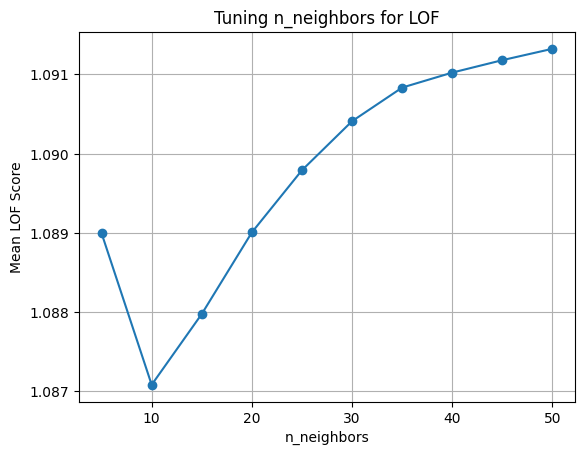

In [108]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import LocalOutlierFactor

neighbors_range = range(5, 51, 5)
mean_scores = []

for n in neighbors_range:
    lof = LocalOutlierFactor(n_neighbors=n)
    lof.fit(X_scaled)
    lof_scores = -lof.negative_outlier_factor_
    mean_scores.append(np.mean(lof_scores))

plt.plot(neighbors_range, mean_scores, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Mean LOF Score')
plt.title('Tuning n_neighbors for LOF')
plt.grid(True)
plt.show()


#### Theoretically, a point with lof > 1 is considered an outlier, and a point with lof ~ 1 or < 1 is considered an inlier. Since around 72% of points have lof > 1, we will consider a point with lof > 1.1 an outlier.

In [109]:
print(len(df[df.lof_score > 1]) / len(df))
print(len(df[df.lof_score > 1.1]) / len(df))
print(len(df[df.user == 1][df.lof_score > 1.1]) / len(df))
print(len(df[df.user == 2][df.lof_score > 1.1]) / len(df))
print(len(df[df.user == 3][df.lof_score > 1.1]) / len(df))
df.loc[df.lof_score > 1.1, 'outlier'] = 1
df = df.drop(columns=['lof_score'])

0.7963859253973848
0.2258452756548576
0.05995374947344893
0.09327046241929798
0.07262106376211068


/var/folders/j6/hnb1wkw115x3893s7581k7s40000gn/T/ipykernel_80083/1214236293.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(df[df.user == 1][df.lof_score > 1.1]) / len(df))
/var/folders/j6/hnb1wkw115x3893s7581k7s40000gn/T/ipykernel_80083/1214236293.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(df[df.user == 2][df.lof_score > 1.1]) / len(df))
/var/folders/j6/hnb1wkw115x3893s7581k7s40000gn/T/ipykernel_80083/1214236293.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(df[df.user == 3][df.lof_score > 1.1]) / len(df))


In [110]:
print(len(df[df.outlier > 0]) / len(df))

0.2258452756548576


#### Now, let's erase all the outliers so we can impute them in the next step.

In [111]:
df.loc[df.outlier == 1, df.columns.difference(['seconds_elapsed', 'user'])] = np.nan
df = df.drop(columns="outlier")
df.isna().sum()/ len(df)

seconds_elapsed    0.000000
z_accelerometer    0.225845
y_accelerometer    0.225845
x_accelerometer    0.225845
z_gyroscope        0.225845
y_gyroscope        0.225845
x_gyroscope        0.225845
user               0.000000
dtype: float64

## Imputation

### We will fill the missing values using interpolation by user.

In [112]:
df.isna().sum() / len(df)

seconds_elapsed    0.000000
z_accelerometer    0.225845
y_accelerometer    0.225845
x_accelerometer    0.225845
z_gyroscope        0.225845
y_gyroscope        0.225845
x_gyroscope        0.225845
user               0.000000
dtype: float64

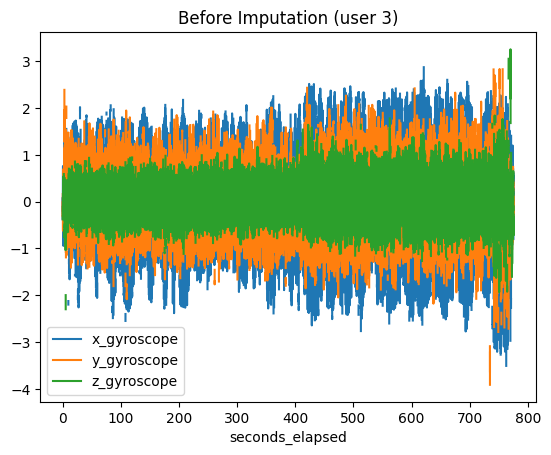

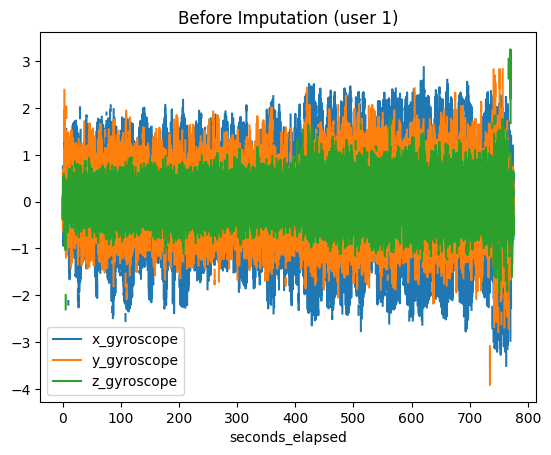

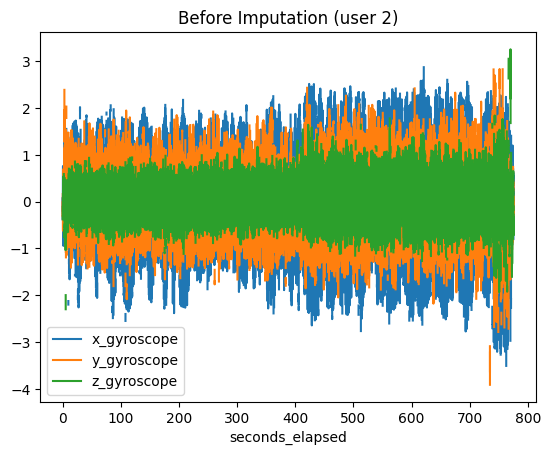

In [113]:
for user in df.user.unique():
    df[df.user == 1].plot(x="seconds_elapsed", y=["x_gyroscope", "y_gyroscope", "z_gyroscope"], title= f"Before Imputation (user {user})")

#### For each user, we interpolate the data corresponding to him.
#### This will result in more accurate results

In [114]:
for user in df.user.unique():
    # Fill the missing values using interpolation
    df[df.user == user] = df[df.user == user].interpolate()
    # Fill the initial data points
    df[df.user == user] = df[df.user == user].fillna(method='bfill')
df

,seconds_elapsed,z_accelerometer,y_accelerometer,x_accelerometer,z_gyroscope,y_gyroscope,x_gyroscope,user
0,0.040027,-0.273211,-0.279689,-0.342461,0.145889,0.136416,0.005533,3
1,0.040460,1.260347,-0.319836,-0.342097,-0.110204,0.161805,-0.306240,1
2,0.049252,1.260347,-0.319836,-0.342097,-0.110204,0.161805,-0.306240,1
3,0.049960,-0.273211,-0.279689,-0.342461,0.145889,0.136416,0.005533,3
4,0.059245,1.274834,-0.240963,-0.358970,-0.145028,0.080974,-0.380480,1
...,...,...,...,...,...,...,...,...
232641,775.538496,-0.992985,-5.758652,4.859346,1.199442,-0.058727,1.369393,3
232642,775.539918,-7.387298,-8.144462,0.807643,-0.370583,-1.712168,-0.019191,2
232643,775.544682,0.172228,-0.416443,0.286711,-0.334846,-0.421050,-0.304001,1
232644,775.548429,-0.732786,-5.806568,5.015984,1.414098,0.109211,1.592959,3


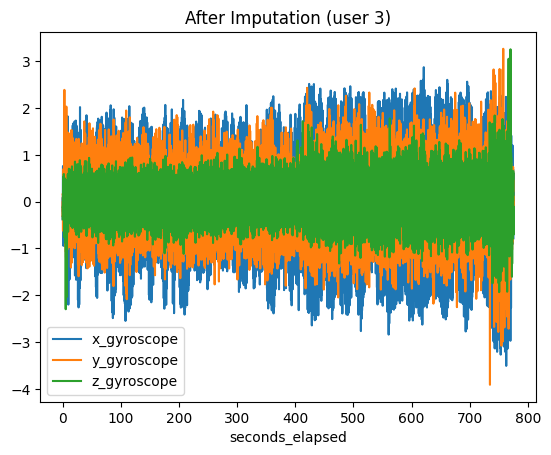

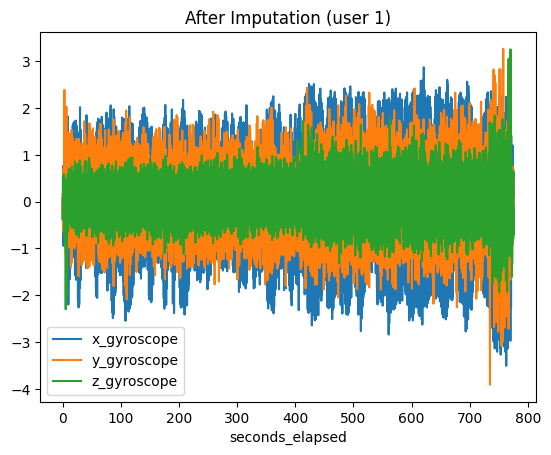

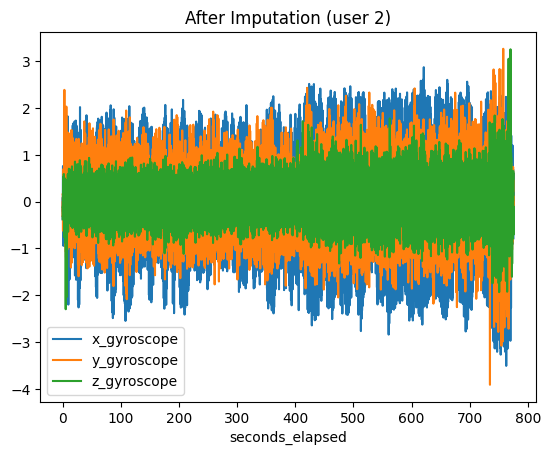

In [115]:
for user in df.user.unique():
    df[df.user == 1].plot(x="seconds_elapsed", y=["x_gyroscope", "y_gyroscope", "z_gyroscope"], title= f"After Imputation (user {user})")

In [116]:
df.isna().sum() / len(df)

seconds_elapsed    0.0
z_accelerometer    0.0
y_accelerometer    0.0
x_accelerometer    0.0
z_gyroscope        0.0
y_gyroscope        0.0
x_gyroscope        0.0
user               0.0
dtype: float64

### Data Transformation

#### Lowpass filter

##### Let's check first how it works by using it in the 'x_accelerometer' column.
##### We will use the lowpass filter function provided by the teacher.

In [117]:
from scipy.signal import butter, lfilter, filtfilt

def low_pass_filter(data_table, col, sampling_frequency, cutoff_frequency, order=5, phase_shift=True):
        # http://stackoverflow.com/questions/12093594/how-to-implement-band-pass-butterworth-filter-with-scipy-signal-butter
        # Cutoff frequencies are expressed as the fraction of the Nyquist frequency, which is half the sampling frequency
        nyq = 0.5 * sampling_frequency
        cut = cutoff_frequency / nyq

        b, a = butter(order, cut, btype='low', output='ba', analog=False)
        if phase_shift:
            data_table[col + '_lowpass'] = filtfilt(b, a, data_table[col])
        else:
            data_table[col + '_lowpass'] = lfilter(b, a, data_table[col])
        return data_table

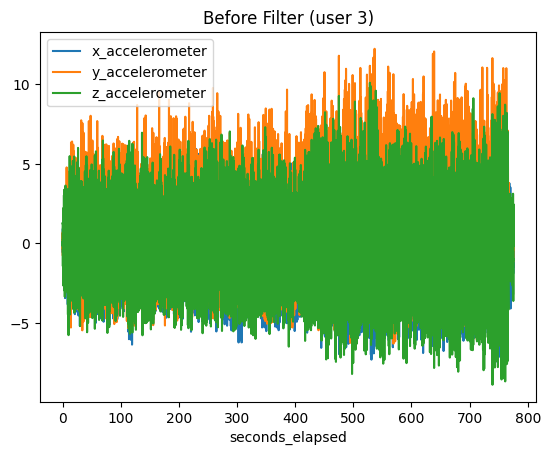

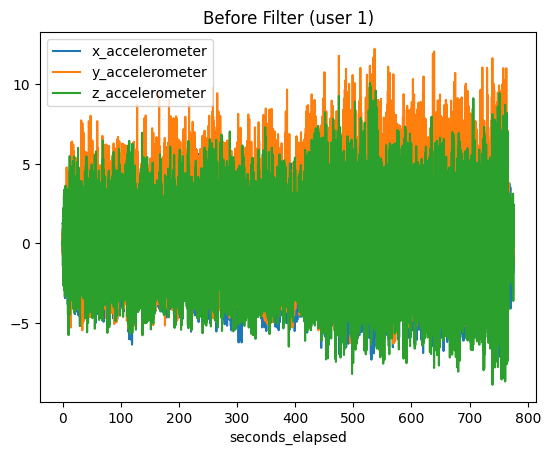

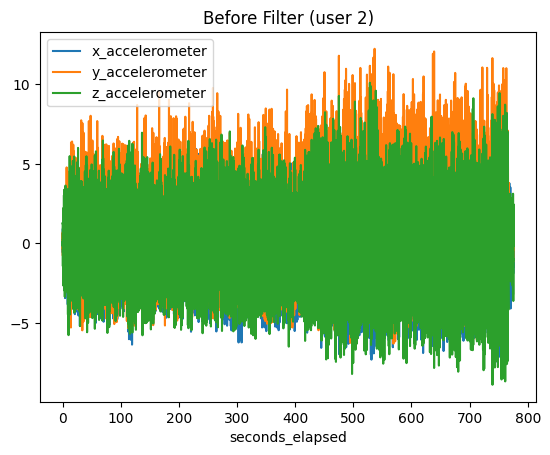

In [118]:
for user in df.user.unique():
    df[df.user == 1].plot(x="seconds_elapsed", y=["x_accelerometer", "y_accelerometer", "z_accelerometer"], title= f"Before Filter (user {user})")

##### We used a sampling frequency of 100Hz, and we will set the cutoff frequency and the order to 0.5Hz and 3, respectively, since these are the values used in an example in the lectures.

/var/folders/j6/hnb1wkw115x3893s7581k7s40000gn/T/ipykernel_80083/1100912163.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + '_lowpass'] = filtfilt(b, a, data_table[col])
/var/folders/j6/hnb1wkw115x3893s7581k7s40000gn/T/ipykernel_80083/1100912163.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table[col + '_lowpass'] = filtfilt(b, a, data_table[col])
/var/folders/j6/hnb1wkw115x3893s7581k7s40000gn/T/ipykernel_80083/1100912163.py:11: SettingWithCopyWarning: 
A value is trying to

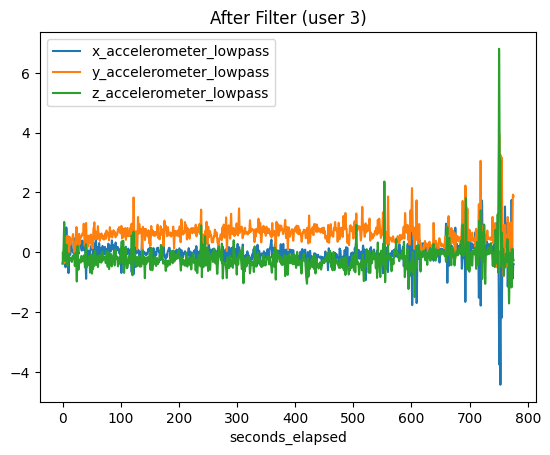

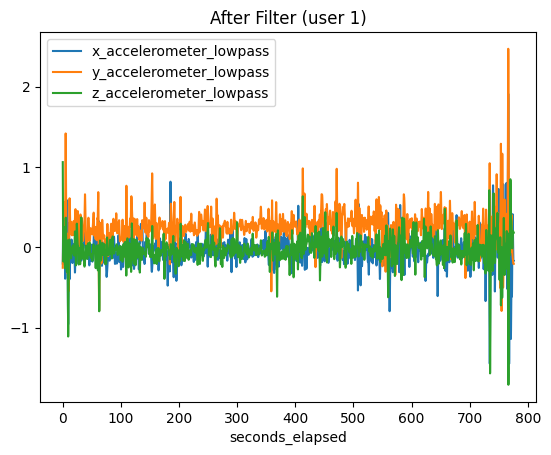

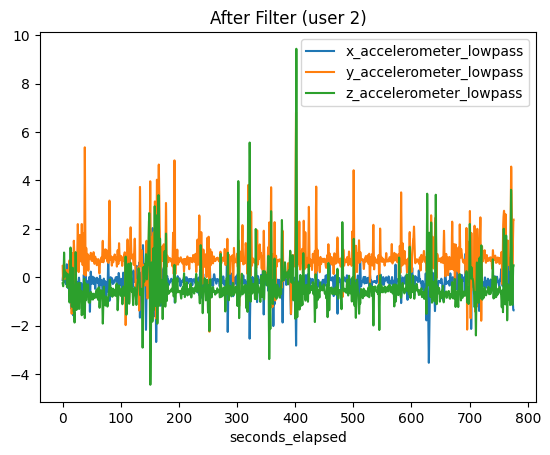

In [119]:
for user in df.user.unique():
    filtered = low_pass_filter(df[df.user == user], "x_accelerometer", sampling_frequency=100, cutoff_frequency=0.5, order=5)
    filtered = low_pass_filter(filtered[filtered.user == user], "y_accelerometer", sampling_frequency=100, cutoff_frequency=0.5, order=5)
    filtered = low_pass_filter(filtered[filtered.user == user], "z_accelerometer", sampling_frequency=100, cutoff_frequency=0.5, order=5)
    filtered[filtered.user == user].plot(x="seconds_elapsed", y=["x_accelerometer_lowpass", "y_accelerometer_lowpass", "z_accelerometer_lowpass"], title= f"After Filter (user {user})")

#### Now, let's apply this to all the data (per user).

In [120]:
for col in df.columns.to_list():
    if col in ["user", "seconds_elapsed"]:
        continue
    
    for user in df.user.unique():
        user_mask = df.user == user
        user_df = df[user_mask]
        user_df = low_pass_filter(df, col, sampling_frequency=100, cutoff_frequency=0.5, order=3)
df

,seconds_elapsed,z_accelerometer,y_accelerometer,x_accelerometer,z_gyroscope,y_gyroscope,x_gyroscope,user,z_accelerometer_lowpass,y_accelerometer_lowpass,x_accelerometer_lowpass,z_gyroscope_lowpass,y_gyroscope_lowpass,x_gyroscope_lowpass
0,0.040027,-0.273211,-0.279689,-0.342461,0.145889,0.136416,0.005533,3,-0.087919,-0.502079,-0.337893,0.064239,0.374091,-0.197714
1,0.040460,1.260347,-0.319836,-0.342097,-0.110204,0.161805,-0.306240,1,-0.094020,-0.499130,-0.336421,0.060449,0.362851,-0.192298
2,0.049252,1.260347,-0.319836,-0.342097,-0.110204,0.161805,-0.306240,1,-0.100092,-0.496159,-0.334926,0.056636,0.351639,-0.186976
3,0.049960,-0.273211,-0.279689,-0.342461,0.145889,0.136416,0.005533,3,-0.106130,-0.493168,-0.333407,0.052802,0.340458,-0.181749
4,0.059245,1.274834,-0.240963,-0.358970,-0.145028,0.080974,-0.380480,1,-0.112131,-0.490155,-0.331866,0.048949,0.329314,-0.176622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232641,775.538496,-0.992985,-5.758652,4.859346,1.199442,-0.058727,1.369393,3,-1.337381,0.147406,0.333657,-0.576126,-0.067586,-0.941701
232642,775.539918,-7.387298,-8.144462,0.807643,-0.370583,-1.712168,-0.019191,2,-1.338083,0.146336,0.333903,-0.576090,-0.067872,-0.941560
232643,775.544682,0.172228,-0.416443,0.286711,-0.334846,-0.421050,-0.304001,1,-1.338672,0.145438,0.334107,-0.576060,-0.068112,-0.941442
232644,775.548429,-0.732786,-5.806568,5.015984,1.414098,0.109211,1.592959,3,-1.339158,0.144694,0.334275,-0.576034,-0.068310,-0.941343


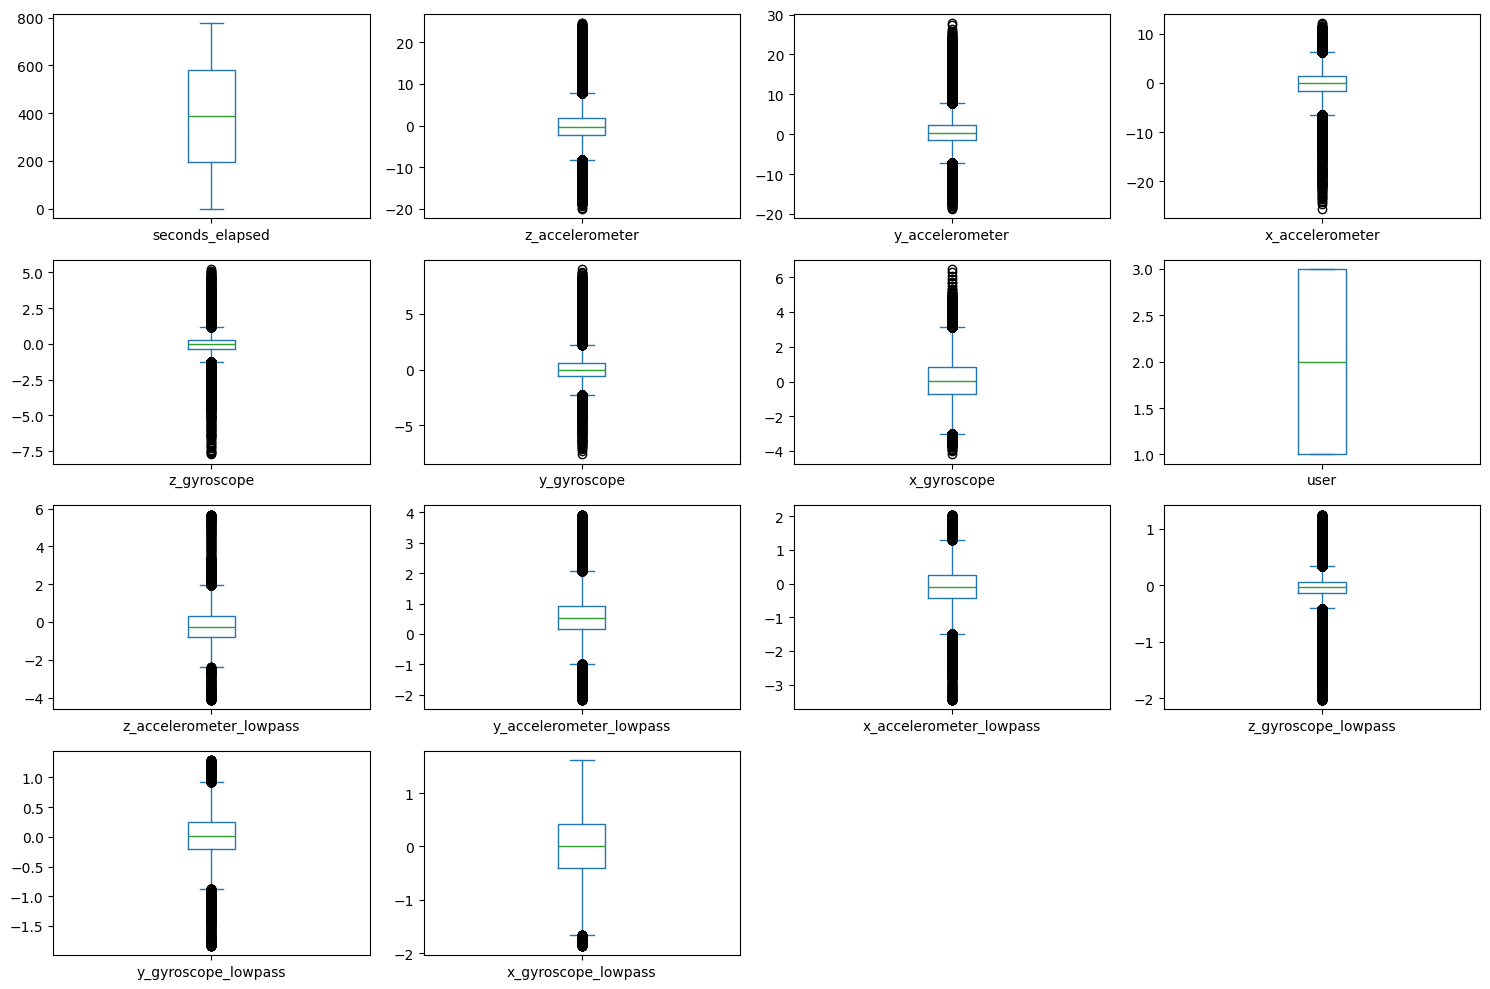

In [121]:
df.plot(kind='box', subplots=True, layout=(int(len(df.columns)**0.5)+1, -1), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


### Principal Component Analysis (PCA)

#### As we can see, the first component explains 99.9% of the variability, so we will only select the first as a new feature.

In [122]:
from sklearn.decomposition import PCA

X = df.drop(columns=['user'])
# First we normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components= len(X.columns))
pca.fit(X_scaled)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.18202969, 0.15722178, 0.1091154 , 0.08865169, 0.08358361,
       0.07625959, 0.06437632, 0.06262738, 0.04624519, 0.04207653,
       0.03702408, 0.0313459 , 0.01944284])

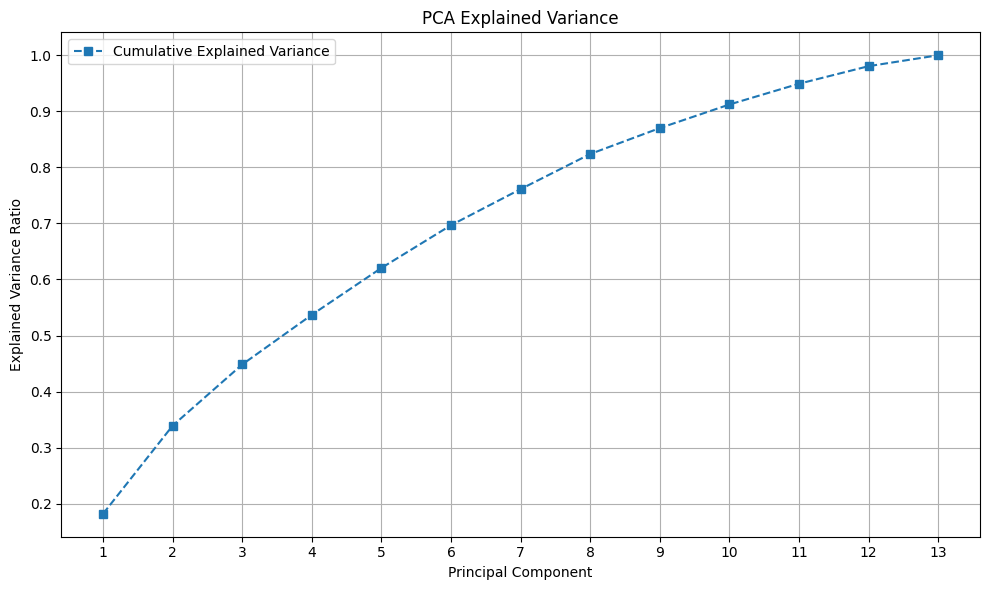

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have PCA fitted:
# explained_variance = pca.explained_variance_ratio_

# Cumulative sum for cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 's--', label='Cumulative Explained Variance')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### We can see here the cumulative variance explained by the first x components.

In [124]:
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

array([0.18202969, 0.33925147, 0.44836687, 0.53701856, 0.62060218,
       0.69686177, 0.76123809, 0.82386547, 0.87011066, 0.91218718,
       0.94921126, 0.98055716, 1.        ])

#### Now, let's add the 10 components to our dataset.

In [125]:
# Convert PCA output to DataFrame
pca_columns = [f'pca_{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns, index=df.index)

# Concatenate with original dataframe
df = pd.concat([df, df_pca], axis=1)

df

,seconds_elapsed,z_accelerometer,y_accelerometer,x_accelerometer,z_gyroscope,y_gyroscope,x_gyroscope,user,z_accelerometer_lowpass,y_accelerometer_lowpass,...,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13
0,0.040027,-0.273211,-0.279689,-0.342461,0.145889,0.136416,0.005533,3,-0.087919,-0.502079,...,-0.358698,-0.992872,-1.506684,0.264751,0.385887,-0.647561,-1.242256,0.212099,0.806083,-1.118422
1,0.040460,1.260347,-0.319836,-0.342097,-0.110204,0.161805,-0.306240,1,-0.094020,-0.499130,...,-0.143218,-1.130201,-1.464593,0.341156,0.633756,-0.420294,-1.484735,0.022319,0.635951,-1.051559
2,0.049252,1.260347,-0.319836,-0.342097,-0.110204,0.161805,-0.306240,1,-0.100092,-0.496159,...,-0.135123,-1.127834,-1.465137,0.352453,0.628880,-0.427888,-1.466034,0.014356,0.629667,-1.024100
3,0.049960,-0.273211,-0.279689,-0.342461,0.145889,0.136416,0.005533,3,-0.106130,-0.493168,...,-0.334416,-0.985791,-1.508386,0.298638,0.371265,-0.670332,-1.186157,0.188215,0.787236,-1.036056
4,0.059245,1.274834,-0.240963,-0.358970,-0.145028,0.080974,-0.380480,1,-0.112131,-0.490155,...,-0.129642,-1.154960,-1.456594,0.324531,0.656941,-0.430889,-1.437520,-0.029626,0.617830,-0.974045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232641,775.538496,-0.992985,-5.758652,4.859346,1.199442,-0.058727,1.369393,3,-1.337381,0.147406,...,0.958522,2.855853,1.117234,1.361023,0.554052,-2.113465,1.122159,1.821601,-0.814296,-0.844963
232642,775.539918,-7.387298,-8.144462,0.807643,-0.370583,-1.712168,-0.019191,2,-1.338083,0.146336,...,-0.333093,2.241354,1.255150,0.144142,0.178556,-1.088618,0.677543,1.406085,-0.342954,-0.713842
232643,775.544682,0.172228,-0.416443,0.286711,-0.334846,-0.421050,-0.304001,1,-1.338672,0.145438,...,1.814419,1.222916,1.484642,0.485963,0.063601,-1.114832,0.319149,0.903399,-0.502342,-0.717991
232644,775.548429,-0.732786,-5.806568,5.015984,1.414098,0.109211,1.592959,3,-1.339158,0.144694,...,0.992154,2.918429,1.101333,1.514741,0.501382,-2.255614,1.214059,1.970074,-0.832247,-0.846098


In [126]:
df.to_csv('data/dataset_imputed.csv', index=False)